# Retrieving Runs.


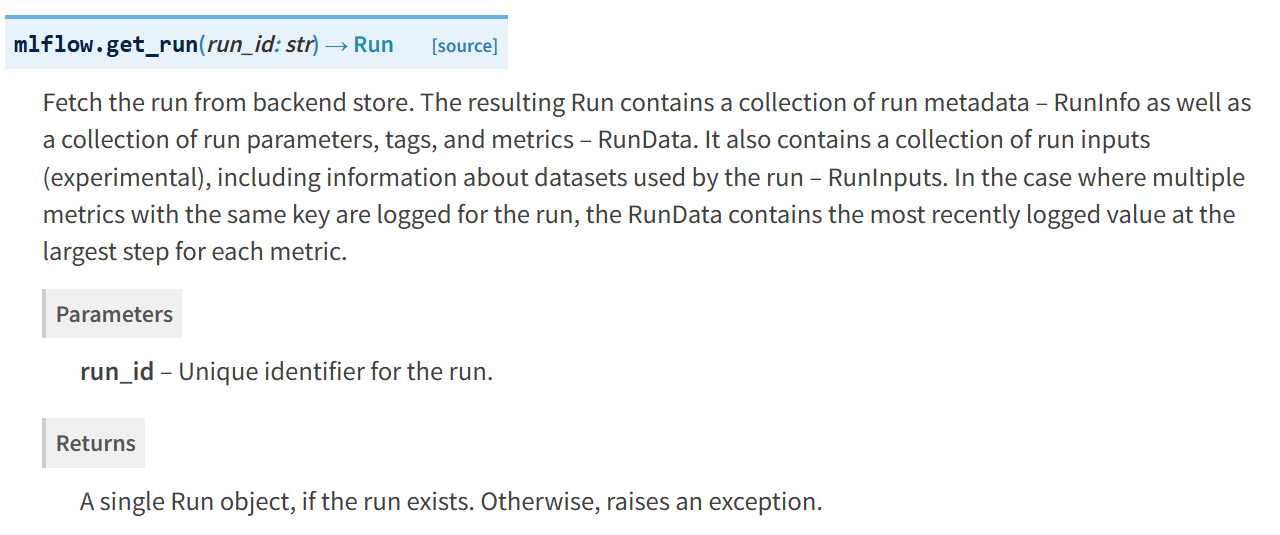

In [1]:
import mlflow 

In [2]:
# First, let's list all runs in the default experiment
runs = mlflow.search_runs(experiment_ids="0")
runs[["run_id", "status"]].head()

,run_id,status
0,cc596e5d33d44096b0cff2c67de6d867,FINISHED
1,b646852fe9b241b0b528ed55b0f39253,FINISHED
2,a9b6e20564b2407cbe967bfb8f08a248,FINISHED
3,69b7dbfd157e46e2bc571a8ef53e6fc9,FINISHED
4,9c8603b4eabb4e7e8da3ddc38623216d,FINISHED


In [3]:
# Now, let's fetch the run ID of the most recent run
run_id = runs.loc[0]["run_id"]
print(run_id)

cc596e5d33d44096b0cff2c67de6d867


In [4]:
run = mlflow.get_run(run_id)
print(run.info.to_proto())
print(run.data.to_dictionary())

run_uuid: "cc596e5d33d44096b0cff2c67de6d867"
experiment_id: "0"
run_name: "vaunted-dove-871"
user_id: "manue"
status: FINISHED
start_time: 1740401279790
end_time: 1740401279810
artifact_uri: "mlflow-artifacts:/0/cc596e5d33d44096b0cff2c67de6d867/artifacts"
lifecycle_stage: "active"
run_id: "cc596e5d33d44096b0cff2c67de6d867"

{'metrics': {}, 'params': {}, 'tags': {'mlflow.runName': 'vaunted-dove-871', 'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py', 'mlflow.source.type': 'LOCAL', 'mlflow.user': 'manue'}}


# Get run using the client
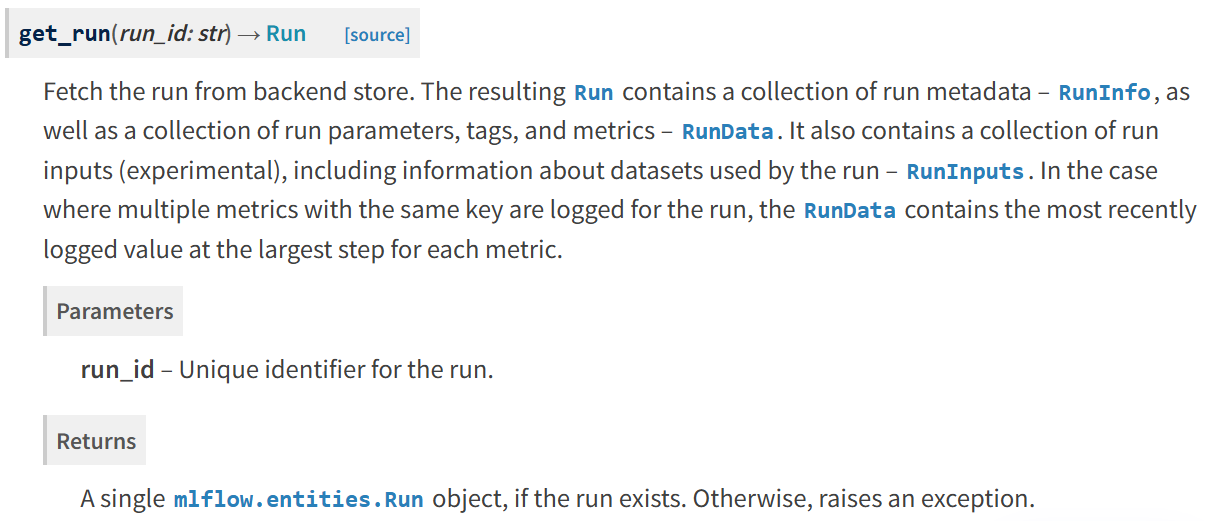

In [5]:
client = mlflow.MlflowClient()

# Get the run object
run = client.get_run(run_id)

# Get the run's data
print(run.data.to_dictionary())

{'metrics': {}, 'params': {}, 'tags': {'mlflow.runName': 'vaunted-dove-871', 'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py', 'mlflow.source.type': 'LOCAL', 'mlflow.user': 'manue'}}


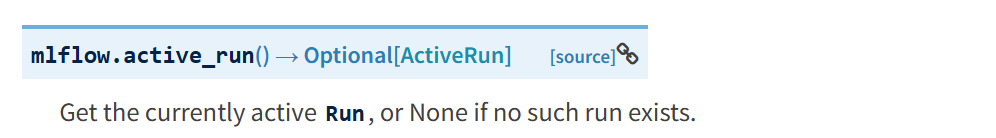

In [6]:
# This method will return the currently active run (if one exists), or None if no run is active
run  = mlflow.active_run()

print(run)

None


In [7]:
# Starting new active run
mlflow.start_run()
# Get the active run
run = mlflow.active_run()
# Print the lifecycle stage of the active run
print(run.info.lifecycle_stage)
# End the active run
mlflow.end_run()
# Get the active run
run = mlflow.active_run()

print(run)

active
None


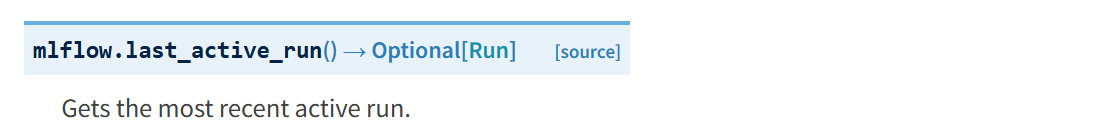

In [8]:
run = mlflow.last_active_run()

print(run)

<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.runName': 'skittish-toad-309',
 'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'manue'}>, info=<RunInfo: artifact_uri='mlflow-artifacts:/0/af541e1720034746b5b07058d721a3c1/artifacts', end_time=1740401513604, experiment_id='0', lifecycle_stage='active', run_id='af541e1720034746b5b07058d721a3c1', run_name='skittish-toad-309', run_uuid='af541e1720034746b5b07058d721a3c1', start_time=1740401513576, status='FINISHED', user_id='manue'>, inputs=<RunInputs: dataset_inputs=[]>>


In [9]:
run.info.to_proto()

run_uuid: "af541e1720034746b5b07058d721a3c1"
experiment_id: "0"
run_name: "skittish-toad-309"
user_id: "manue"
status: FINISHED
start_time: 1740401513576
end_time: 1740401513604
artifact_uri: "mlflow-artifacts:/0/af541e1720034746b5b07058d721a3c1/artifacts"
lifecycle_stage: "active"
run_id: "af541e1720034746b5b07058d721a3c1"

In [10]:
with mlflow.start_run(run_name="started-run") as run:
    print("WITHIN RUN CONTEXT\n")

print("OUTSIDE RUN CONTEXT")
run1 = mlflow.active_run()

run2 = mlflow.last_active_run()

WITHIN RUN CONTEXT

OUTSIDE RUN CONTEXT


In [13]:
run1 == None

True

In [15]:
# This will print data since there was an active run in the current python process.
print(run2.info.to_proto())
print("Run Status: ",run2.info.status)

run_uuid: "dde603c3868c4d92947183a935f97ac2"
experiment_id: "0"
run_name: "started-run"
user_id: "manue"
status: FINISHED
start_time: 1740401703744
end_time: 1740401703780
artifact_uri: "mlflow-artifacts:/0/dde603c3868c4d92947183a935f97ac2/artifacts"
lifecycle_stage: "active"
run_id: "dde603c3868c4d92947183a935f97ac2"

Run Status:  FINISHED
